## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from transformers_interpret import SequenceClassificationExplainer


In [2]:
# Modify Python path
import sys
sys.path.insert(0, '../../')

# Import evaluation processing functions
from utils.eval import (
    evaluate_sti, 
    get_cps_score,
	cls_explainer
)

## Explaination of Evaluation Metrics
The metrics we will use are:

**1. Style Transfer Intensity (STI)**

The STI metric is used to measure how much a
style transfer model has changed the style of a text sample.

**2. Content Preservation Score (CPS)**

The CPS metric is used to measure how well a
style transfer model preserves the original content of a text sample.


In [3]:
# Load the CSV file
file_path = '../../data/bart_evaluated.csv'
df = pd.read_csv(file_path)

# Ensure the column names match CSV file's column names
source_label_0_col = 'source_label_0'
source_label_1_col = 'source_label_1'
target_label_0_col = 'target_label_0'
target_label_1_col = 'target_label_1'
predicted_label_0_col = 'predicted_label_0'  
predicted_label_1_col = 'predicted_label_1'

## Metric Calculation

In [4]:
#get STI
STI = [evaluate_sti(source_proba= [row[source_label_0_col], row[source_label_1_col]],
					pred_proba=  [row[predicted_label_0_col], row[predicted_label_1_col]],
					target_proba= [row[target_label_0_col], row[target_label_1_col]])
                    for index, row in df.iterrows()]

In [5]:
CPS = df.apply(lambda row: get_cps_score(row['source_text'],row['predictions']),axis=1)


In [27]:
# Combine results in a new DataFrame
evaluation_df = pd.DataFrame({
    "Source Text": df['source_text'],
    "Target Text": df['target_text'],
    "Predicted Text": df['predictions'],
    "STI" : STI,
	"CPS" : CPS
})

In [28]:
evaluation_df.head()

,Source Text,Target Text,Predicted Text,STI,CPS
0,"in april 2009 a brazilian human rights group, ...","in april 2009 a brazilian human rights group, ...","in april 2009 a brazilian human rights group, ...",0.241063,1.000000
1,the 51 day standoff and ensuing murder of 76 m...,the 51 day standoff and ensuing deaths of 76 m...,the 51 day standoff and ensuing murder of 76 m...,0.200629,1.000000
2,"mark oaten (born 8 march 1964, watford) is a d...","mark oaten (born 8 march 1964, watford) is a l...","mark oaten (born 8 march 1964, watford) is a l...",0.367568,0.934390
3,another infamous period of colonisation in anc...,another period of colonisation in ancient time...,another period of colonisation in ancient time...,0.355609,0.851425
4,photo sequence of astonishing 2005 chicagoland...,photo sequence of 2005 chicagoland crash with ...,photo sequence of 2005 chicagoland crash with ...,0.331016,0.983531


## Evaluating STI :

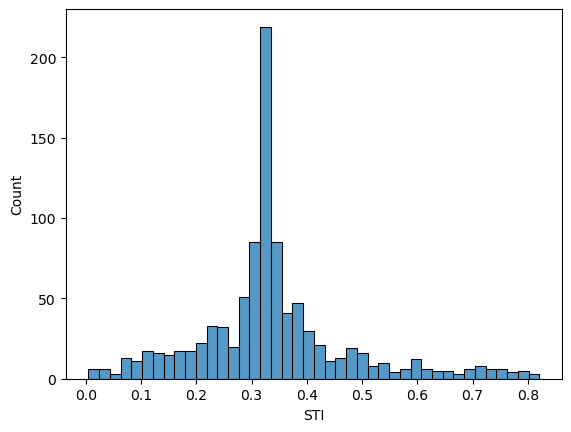

In [29]:
sns.histplot(evaluation_df,x='STI')
plt.show()

<i> Obs: 1. Most texts have STI of 0.32

1. High Style Transfer Examples

In [30]:
#Let us check some examples with high STI
max_sti_df = evaluation_df.sort_values(by='STI',ascending=False).head(n = 5) 

In [31]:
print("source text :" ,max_sti_df['Source Text'].iloc[0])
print("Target Text : ", max_sti_df['Target Text'].iloc[0])
print("Predicted Text : ", max_sti_df['Predicted Text'].iloc[0])
print("STI : ", max_sti_df['STI'].iloc[0])

source text : muzaffarabad is the capital of the pakistani territory of pakistan occupied kashmir.
Target Text :  muzaffarabad is the capital of the pakistani territory of pakistan administered kashmir.
Predicted Text :  muzaffarabad is the capital of the pakistani territory of pakistan administered kashmir.
STI :  0.8210584105


<i> Perfect Style Transfer

In [32]:
print("source text :" ,max_sti_df['Source Text'].iloc[1])
print("Target Text : ", max_sti_df['Target Text'].iloc[1])
print("Predicted Text : ", max_sti_df['Predicted Text'].iloc[1])


source text : it also has a small concessions stand, run by the fantastic volunteer staff, which sells refreshments and earplugs.
Target Text :  it also has a small concessions stand, run by the volunteer staff, which sells refreshments and earplugs.
Predicted Text :  it also has a small concessions stand, run by the volunteer staff, which sells refreshments and earplugs.


In [33]:
print("source text :" ,max_sti_df['Source Text'].iloc[3])
print("Target Text : ", max_sti_df['Target Text'].iloc[3])
print("Predicted Text : ", max_sti_df['Predicted Text'].iloc[3])

source text : he is best known for his metal wall sculptures and looney tunes shadow boxes.
Target Text :  he is known for his metal wall sculptures and looney tunes shadow boxes.
Predicted Text :  he is known for his metal wall sculptures and looney tunes shadow boxes.


<b> High STI is when prediction text style matches perfecty with Target Text Style

2. Common Style Transfer examples. (STI = 0.32)

In [13]:
common_sti_df = evaluation_df[(evaluation_df['STI']>=0.3) & (evaluation_df['STI'] < 0.33)]

In [14]:
#Let us check some examples
common_sti_df = common_sti_df.sort_values(by='STI',ascending=False)

In [15]:
print("source text :" ,common_sti_df['Source Text'].iloc[3])
print("Target Text : ", common_sti_df['Target Text'].iloc[3])
print("Predicted Text : ", common_sti_df['Predicted Text'].iloc[3])

source text : he also denied many aspects of the holocaust, claiming death figures were far lower , arguing that all sides were guilty of equally awful atrocities.
Target Text :  he also contested many aspects of the holocaust, claiming death figures were far lower , arguing that all sides were guilty of equally awful atrocities.
Predicted Text :  he also denied many aspects of the holocaust, claiming death figures were far lower , arguing that all sides were guilty of equally awful atrocities.


In [16]:
print("source text :" ,common_sti_df['Source Text'].iloc[10])
print("Target Text : ", common_sti_df['Target Text'].iloc[10])
print("Predicted Text : ", common_sti_df['Predicted Text'].iloc[10])
print("STI : 0.32")

source text : this, combined with continuing resentment that historically romanian lands remained part of the soviet union, in the guise of the moldavian ssr, inevitably led romania under gheorgiu-dej on a relatively independent and nationalist route.
Target Text :  this, combined with continuing resentment that historically romanian lands remained part of the soviet union, in the form of the moldavian ssr, inevitably led romania under gheorgiu-dej on a relatively independent and nationalist route.
Predicted Text :  this, combined with continuing resentment that historically romanian lands remained part of the soviet union, in the guise of the moldavian ssr, led romania under gheorgiu-dej on a relatively independent and nationalist route.
STI : 0.32


3. Low Style Transfer Examples

In [17]:
min_sti_df = evaluation_df[(evaluation_df['STI']>=0) & (evaluation_df['STI'] < 0.2)]

In [18]:
print("source text :" ,min_sti_df['Source Text'].iloc[10])
print("Target Text : ", min_sti_df['Target Text'].iloc[10])
print("Predicted Text : ", min_sti_df['Predicted Text'].iloc[10])

source text : superior walls foundations are known for being strong, environmentally friendly , and quick to install .
Target Text :  superior walls foundations are noted for being strong, environmentally friendly , and quick to install .
Predicted Text :  superior walls foundations are known for being strong, environmentally friendly , and quick to install .


<i>No change in prediction 

## Evaluating CPS :

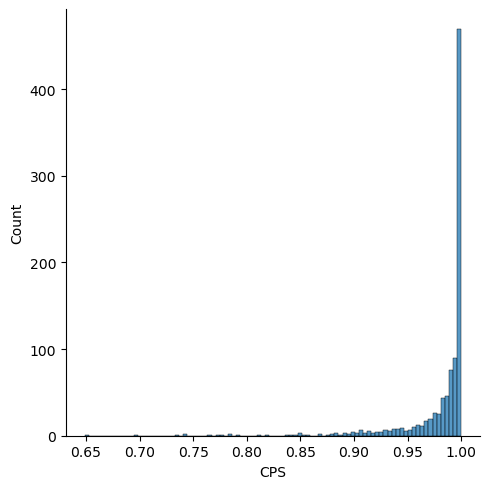

In [19]:
sns.displot(evaluation_df['CPS'])

Observtions:
1. Most texts have CPS of 1, meaning the content has been perfectly preserved!
2. Some texts have very low CPS. We need to analyze them. 

## Creating buckets for STI and CPS

1.  STI_buckets :
0.0 - 0.2 : bad
0.2 - 0.5 : good
greater than 0.5 : great

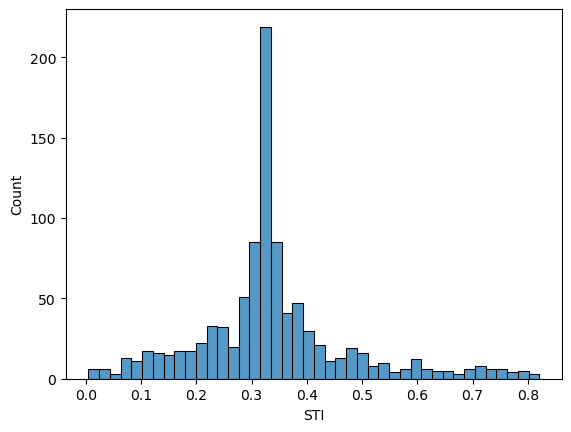

In [20]:
sns.histplot(evaluation_df,x='STI')
plt.show()

In [21]:
# Define the bins and labels for STI
bins = [0 ,0.15, 0.3, 0.5, 0.8]
labels = ['Bad', 'Decent','Good','Perfect']

# Create the new 'sti categories' column
evaluation_df['STI Categories'] = pd.cut(evaluation_df['STI'], bins=bins, labels=labels)

In [22]:
#proportion of entries in each STI Category
sti_category_proportions = evaluation_df['STI Categories'].value_counts(normalize=True)
sti_category_proportions.sort_values()

Bad        0.082377
Perfect    0.107404
Decent     0.228363
Good       0.581856
Name: STI Categories, dtype: float64

2. CPI Buckets : 

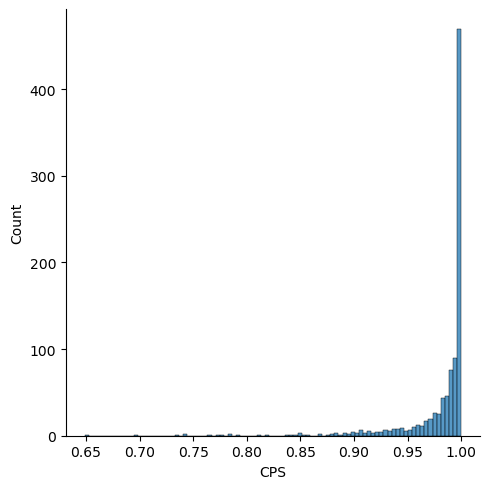

In [23]:
sns.displot(evaluation_df['CPS'])

In [24]:
# Define the bins and labels for STI
bins = [0 ,0.9, 0.95, 0.999, 1]
labels = ['Bad', 'Decent','Good','Perfect']
# Create the new 'sti categories' column
evaluation_df['CPS Categories'] = pd.cut(evaluation_df['CPS'], bins=bins, labels=labels)

cps_category_proportions = evaluation_df['CPS Categories'].value_counts(normalize=True)
cps_category_proportions.sort_values()

Bad        0.039460
Decent     0.075805
Perfect    0.402908
Good       0.481828
Name: CPS Categories, dtype: float64

In [25]:
eval_df_analysis = evaluation_df[(evaluation_df['STI'] > 0.65) & (evaluation_df['STI'] < 0.7)]

In [34]:
eval_df_analysis.head()

,Source Text,Target Text,Predicted Text,STI,CPS,STI Categories,CPS Categories
32,films included marvelous performances in kenne...,films included performances in kenneth branagh...,films included performances in kenneth branagh...,0.660655,0.967088,Perfect,Good
155,the second-biggest operation of the u.s. globa...,the second-biggest operation of the u.s. globa...,the second-biggest operation of the u.s. globa...,0.653501,0.997935,Perfect,Good
234,"unfortunately , completing any construction pr...","however , completing any construction project ...","however , completing any construction project ...",0.675413,0.996402,Perfect,Good
235,"#1219 ""i love carole cook"" - legendary actress...","#1219 ""i love carole cook"" - legendary actress...","#1219 ""i love carole cook"" - legendary actress...",0.685300,0.968760,Perfect,Good
288,the rest of the world was slow to adopt this r...,the rest of the world was slow to adopt this t...,the rest of the world was slow to adopt this t...,0.685726,0.991566,Perfect,Good


In [35]:
print("Source Text :",eval_df_analysis.loc[901,:][0])
print("Target Text :",eval_df_analysis.loc[901,:][1])
print("Predicted Text :",eval_df_analysis.loc[901,:][2])
print("STI :",eval_df_analysis.loc[901,:][3])
print("CPS :",eval_df_analysis.loc[901,:][4])

Source Text : the band is a member of audioconfusion, a collective that hosts several notable arizona bands.
Target Text : the band is a member of audioconfusion, a collective that hosts several arizona bands.
Predicted Text : the band is a member of audioconfusion, a collective that hosts several arizona bands.
STI : 0.6933752399999998
CPS : 0.9901055693626404


In [36]:
print("Source Text :",evaluation_df.loc[741,:][0])
print("Target Text :",evaluation_df.loc[741,:][1])
print("Predicted Text :",evaluation_df.loc[741,:][2])
print("STI :",evaluation_df.loc[741,:][3])
print("CPS :",evaluation_df.loc[741,:][4])

Source Text : muzaffarabad is the capital of the pakistani territory of pakistan occupied kashmir.
Target Text : muzaffarabad is the capital of the pakistani territory of pakistan administered kashmir.
Predicted Text : muzaffarabad is the capital of the pakistani territory of pakistan administered kashmir.
STI : 0.8210584105
CPS : 0.9958623647689819


In [ ]:
test = 'pakistani territory of pakistan occupied kashmir.'
word_attrn = cls_explainer(test)
cls_explainer.visualize()

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,LABEL_1 (0.99),LABEL_1,1.36,[CLS] pakistani territory of pakistan occupied kashmir . [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,LABEL_1 (0.99),LABEL_1,1.36,[CLS] pakistani territory of pakistan occupied kashmir . [SEP]
